Este notebook será utilizado para o teste de códigos diversos para fins de aprendizado em Python.

In [1]:
"""
Importações necessárias para o funcionamento do programa
"""
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

df = pd.read_excel('/home/maiky/Desktop/FCC_junho2020.xlsx', skiprows=2)
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('.', '')

In [2]:
# mostra a quantidade de linhas de uma planilha
# df.index

# mostra o nome das colunas de uma planilha
#df.columns

# mostra as primeiras n linhas de uma planilha
# df.head(n)

# ordena as linhas de acordo com a coluna
# df.sort_values(by='Coluna')

# seleciona os dados
# df['Seleção']

# filtro de dados com duas ou mais condições:
# df[df['Classe'].isin(['Instalação']) & df['Marca'].isin(['DIXTAL', 'PROLIFE'])]

#df.pivot_table(d'Contador'f, index=['Tipo Equip.'], columns=['Classe'])

# contagem de valores
# df.Coluna.value_counts()

# converte dados para a plotagem adequada
# necessário especificar o máximo possível
# df.to_numpy()

df2 = df.loc[:,["Classe_OS", 'Tipo_Equipamento', 'Informação_inserida_em_CO']]

#    df2.pivot_table(df2, index = ['Tipo_Equip'], columns = ['Classe'], aggfunc='count')

df2

,Classe_OS,Tipo_Equipamento,Informação_inserida_em_CO
0,INST,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NaN
1,INST,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NaN
2,INST,VENTILADOR UTI,NaN
3,INST,MONITOR FISIOLOGICO MULTIUSO,NaN
4,MC,BALANCA PACIENTE INFANTIL ELETRONICA,NPF
...,...,...,...
570,MP,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NPF
571,MP,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NPF
572,MP,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NPF
573,MP,AQUECEDOR PACIENTE IRRADIACAO INFANTIL,NPF


In [3]:
df3 = df2[~df2['Classe_OS'].isin(['INST'])]

df4 = df3.pivot_table(df3,index=['Tipo_Equipamento'], columns=['Informação_inserida_em_CO'], aggfunc='count').replace(np.NaN, 0).astype(np.int)
df4

Classe_OS                             \
Informação_inserida_em_CO                    ACC BAT EF FFPM HF NCA NPF SIF   
Tipo_Equipamento                                                              
ACIONADOR-CHAVE                                1   0  0    0  0   0   0   0   
ALCA RESSECCAO                                 1   0  0    0  0   0   0   0   
ANA LAB HEM CTG CELULA MANUAL                  1   0  0    0  0   0   0   0   
AQUECEDOR PACIENTE IRRADIACAO INFANTIL         0   0  0    0  0   0  16   0   
ASPIRADOR CIRURGICO                            0   0  0    0  0   0   0   1   
...                                          ...  .. ..  ... ..  ..  ..  ..   
UNI RADIOGRAFICA MOVEL                         0   0  0    0  0   0   3   0   
VALVULA REGULADORA                             1   0  0    0  0   0   0   0   
VENTILADOR PORTATIL DOMICILIAR                 1   0  0    0  0   0   2   0   
VENTILADOR TRANSPORTE                          0   0  0    0  0   0   1   0   
VENTILADOR UTI                                 0   0  1    2  4   3   7   0   

                                                
Informação_inserida_em_CO              UPF USE  
Tipo_Equipamento                                
ACIONADOR-CHAVE                          1   0  
ALCA RESSECCAO                           0   0  
ANA LAB HEM CTG CELULA MANUAL            0   0  
AQUECEDOR PACIENTE IRRADIACAO INFANTIL   0   0  
ASPIRADOR CIRURGICO                      0   0  
...                                     ..  ..  
UNI RADIOGRAFICA MOVEL                   0   0  
VALVULA REGULADORA                       0   0  
VENTILADOR PORTATIL DOMICILIAR           0   0  
VENTILADOR TRANSPORTE                    0   0  
VENTILADOR UTI                           2   0  

[83 rows x 10 columns]

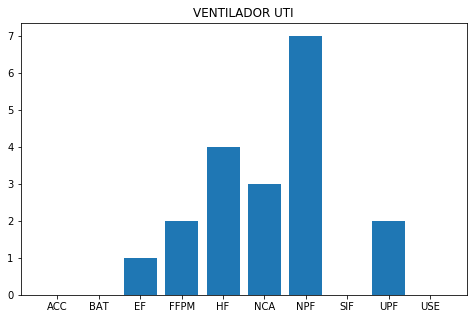

In [21]:

equipamento = 'VENTILADOR UTI'

dados = df4.loc[equipamento].to_numpy()
legenda = df4.loc[equipamento].unstack(0).index.to_numpy()

plt.figure(figsize = (8,5))
plt.bar(legenda, dados)
plt.title(equipamento)
plt.show()

In [84]:
tipo_OS = 'MC'
equip = 'DESFIBRILADOR-CARDIOVERSOR'
cod = 'UPF'

df31 = df3[df3['Classe_OS'].isin(['MC')]

df5 = df31.pivot_table(df31, index=['Tipo_Equipamento'], columns=['Informação_inserida_em_CO'], aggfunc='count').replace(np.NaN, 0).astype(np.int)

df5.unstack().loc['Classe_OS']

df5 = df5.unstack(0).loc['Classe_OS'].loc[cod].sort_values(ascending=True)
#dados3 = df5[df5 > 0].to_numpy()
#legenda3 = df5[df5 > 0].index.to_numpy()
#df5

Informação_inserida_em_CO  Tipo_Equipamento              
ACC                        ACIONADOR-CHAVE                   1
                           ALCA RESSECCAO                    1
                           ANA LAB HEM CTG CELULA MANUAL     1
                           ASPIRADOR CIRURGICO               0
                           AUTOCLAVE GRANDE PORTE            0
                                                            ..
USE                        UNI ANESTESIA                     0
                           UNI HEMODIALISE                   0
                           VALVULA REGULADORA                0
                           VENTILADOR PORTATIL DOMICILIAR    0
                           VENTILADOR UTI                    0
Length: 520, dtype: int64

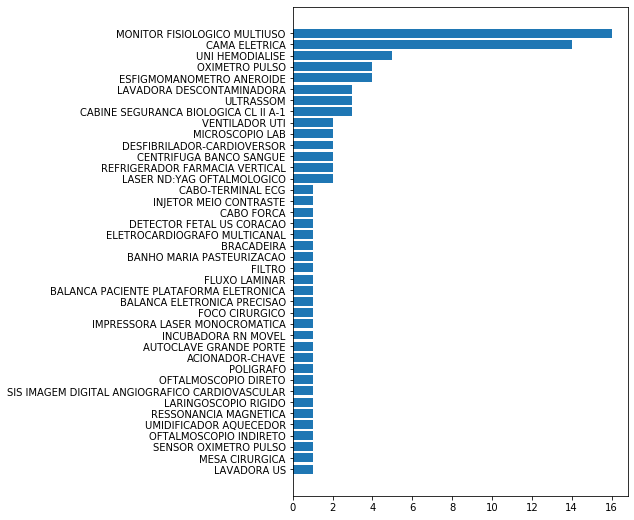

In [17]:
plt.figure(figsize = (6,9))
plt.barh(legenda3,dados3)
plt.show()

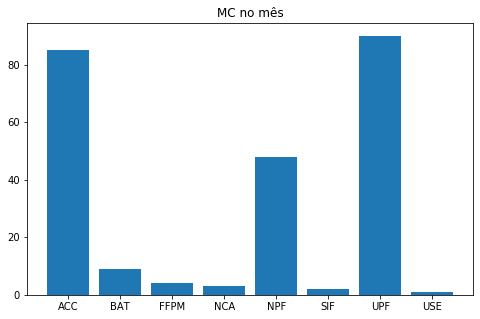

In [88]:
df6 = df31.pivot_table(df31, index = 'Informação_inserida_em_CO', columns=['Classe_OS'], aggfunc = 'count')
dados4 = df6.unstack(0).to_numpy()
legenda4 = df6.unstack().loc['Tipo_Equipamento'].loc['MC'].index.to_numpy()


plt.figure(figsize = (8,5))
plt.bar(legenda4, dados4)
plt.title('MC no mês')
plt.show()

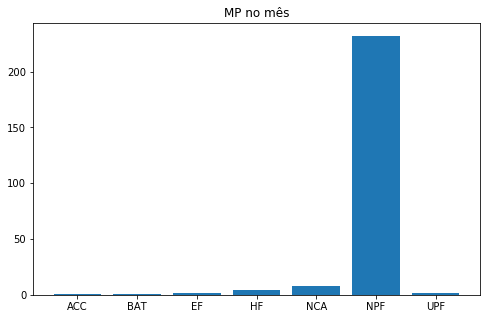

In [101]:
df32 = df3[df3['Classe_OS'].isin(['MP'])]

df7 = df32.pivot_table(df32, index = 'Informação_inserida_em_CO', columns=['Classe_OS'], aggfunc = 'count')
dados5 = df7.unstack().loc['Tipo_Equipamento'].loc['MP'].to_numpy()
legenda5 = df7.unstack().loc['Tipo_Equipamento'].loc['MP'].index.to_numpy()


plt.figure(figsize = (8,5))
plt.bar(legenda5, dados5)
plt.title('MP no mês')
plt.show()

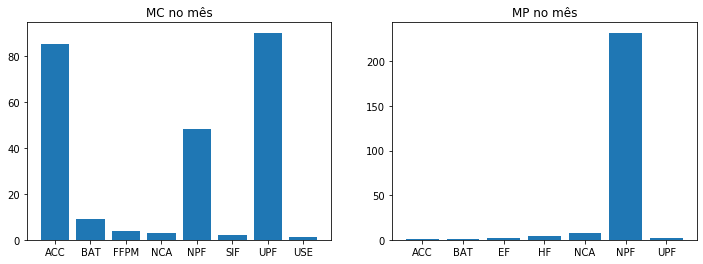

In [111]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.bar(legenda4, dados4)
plt.title('MC no mês')

plt.subplot(1,2,2)
plt.bar(legenda5, dados5)
plt.title('MP no mês')

plt.show()